In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

df = pd.read_csv('data/kc_house_data.csv')

In [2]:
grade_num = []
for index, row in df.iterrows():
    grade_num.append(int((str(row['grade'])[0:2])))
df['grade_num'] = grade_num
df.drop('grade', axis = 1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,grade_num
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,7
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,7
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,6
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,7
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,8
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,8
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,7
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,8


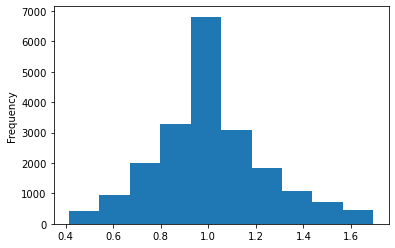

In [3]:
df.sqft_living.describe()
df['sqft_living_ratio'] = df['sqft_living'] / df['sqft_living15']
df.sqft_living_ratio.describe()


df['sqft_living_ratio'] = df.sqft_living / df.sqft_living15
df['sqft_living_ratio'] = df['sqft_living_ratio'].loc[(np.abs(stats.zscore(df.sqft_living_ratio)) < 2)]
df = df.dropna(subset = ['sqft_living_ratio'])
df.sqft_living_ratio.plot.hist();

count    20386.000000
mean         1.042518
std          0.312278
min          0.054972
25%          0.933333
50%          1.000000
75%          1.077654
max          3.275862
Name: sqft_lot_ratio, dtype: float64

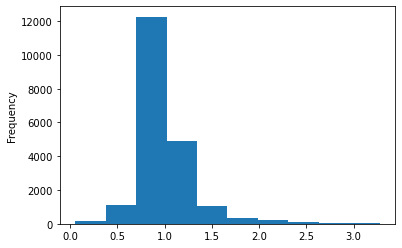

In [4]:
df.sqft_lot15.describe()
df['sqft_lot_ratio'] = df['sqft_lot'] / df['sqft_lot15']
df.sqft_lot_ratio.describe()

df['sqft_lot_ratio'] = df.sqft_lot / df.sqft_lot15
df['sqft_lot_ratio'] = df['sqft_lot_ratio'].loc[(np.abs(stats.zscore(df.sqft_lot_ratio)) < 2)]
df = df.dropna(subset = ['sqft_lot_ratio'])
df.sqft_lot_ratio.plot.hist();
df.sqft_lot_ratio.describe()

In [5]:
from statsmodels.formula.api import ols
X = df[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode','sqft_living15', 'sqft_lot15', 'grade_num']]
y = df.price

formula = 'price~ bedrooms + bathrooms + sqft_living_ratio + sqft_lot_ratio + C(waterfront) + floors + C(zipcode) + grade_num'
regression = ols(formula, data = df).fit().summary()

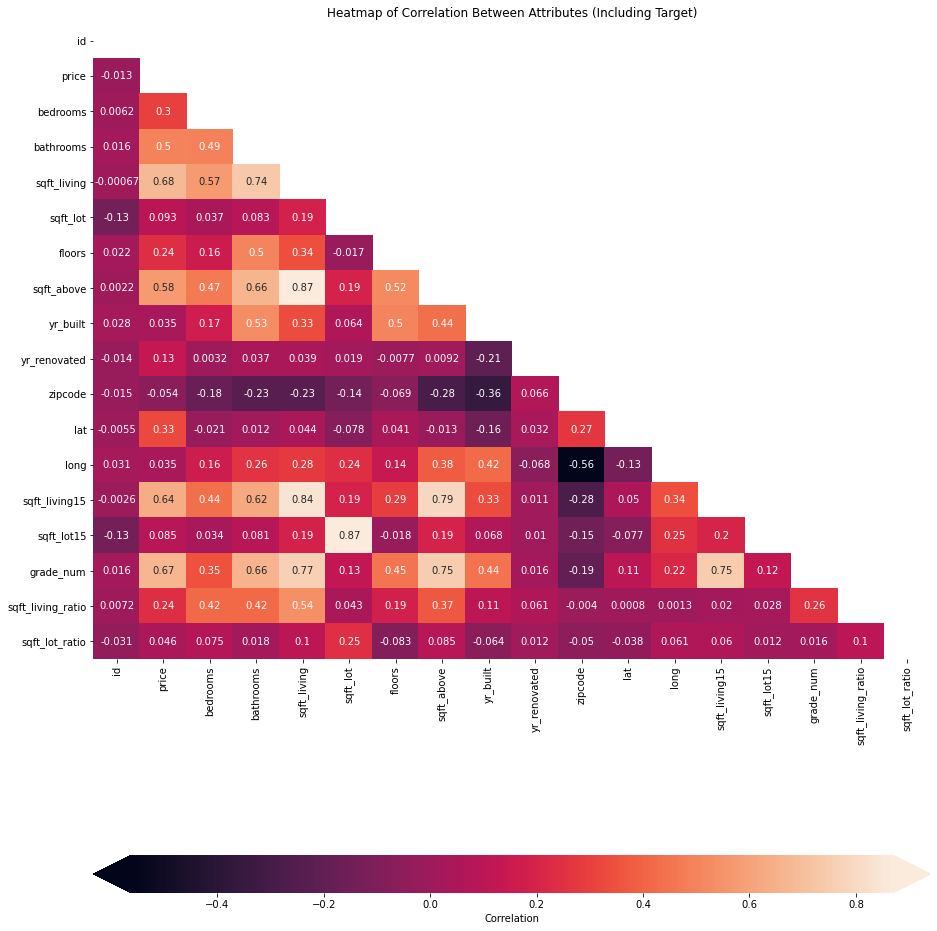

In [6]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(15, 18))
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    # Specifies that we want labels, not just colors
    annot=True,
    # Customizes colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

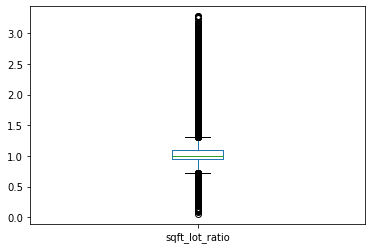

In [34]:
df.sqft_lot15.describe()
df['sqft_lot_ratio'] = df['sqft_lot'] / df['sqft_lot15']
df.sqft_lot_ratio.describe()
df.sqft_lot_ratio.plot.box()

df['sqft_lot_ratio'] = df.sqft_living / df.sqft_living15
df['sqft_lot_ratio'] = df['sqft_lot_ratio'].loc[(np.abs(stats.zscore(df.sqft_living_ratio)) < 2)]
df = df.dropna(subset = ['sqft_living_ratio'])

In [8]:
#Importing modules, tools, etc.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.formula.api import ols

#importing main dataframe as df
df = pd.read_csv('data/kc_house_data.csv')

12764    13540
7245     12050
3910     10040
9245      9890
8085      9640
         ...  
11488      420
8614       410
21316      390
860        380
15367      370
Name: sqft_living, Length: 21597, dtype: int64
4980.0


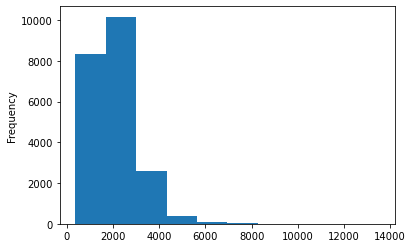

In [9]:
#Converting grade column to an int value

#Create a dummy list
grade_num = []

#Go through each row, grabbing the first index off the string, conver to int
for index, row in df.iterrows():
    grade_num.append(int((str(row['grade'])[0:2])))

#drop the old column and add the new
df['grade_num'] = grade_num
df.drop('grade', axis = 1)

# Turning NaNs in the waterfront data into NO's, then converting waterfront to binary.
# 0 is a waterfront no, 1 is a waterfront yes
#

df.waterfront.fillna(value='NO', inplace = True)
df.waterfront.replace( to_replace = ['NO','YES'], value =  [0,1], inplace = True)

print(df['sqft_living'].sort_values(ascending = False))
#Those are some big results.
print(df['sqft_living'].quantile(0.99))
# even the 99 percentile is still sub 5000. 
df['sqft_living'].plot(kind = 'hist');
#Plotting this shows a bit skew right.


#It may be wise to shave the model off around there.

<AxesSubplot:ylabel='Frequency'>

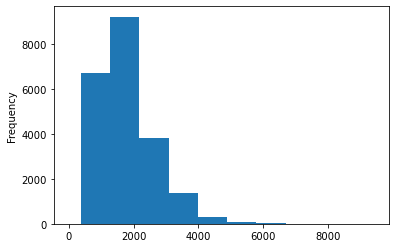

In [10]:
df['sqft_above'].sort_values(ascending = False) 
df['sqft_above'].quantile(.99)
#Not quite as extreme as sqft_livable

df['sqft_above'].plot(kind='hist');

df.sqft_living.describe()
df['sqft_living_ratio'] = df['sqft_living'] / df['sqft_living15']
df.sqft_living_ratio.describe()


df['sqft_living_ratio'] = df.sqft_living / df.sqft_living15
df['sqft_living_ratio'] = df['sqft_living_ratio'].loc[(np.abs(stats.zscore(df.sqft_living_ratio)) < 2)]
df = df.dropna(subset = ['sqft_living_ratio'])
df.sqft_living_ratio.plot.hist()

count    20386.000000
mean         1.042518
std          0.312278
min          0.054972
25%          0.933333
50%          1.000000
75%          1.077654
max          3.275862
Name: sqft_lot_ratio, dtype: float64

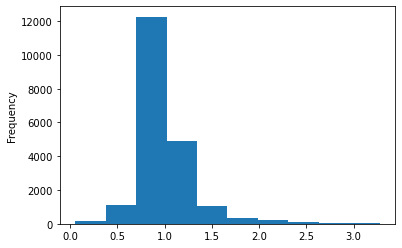

In [11]:
df.sqft_lot15.describe()
df['sqft_lot_ratio'] = df['sqft_lot'] / df['sqft_lot15']
df.sqft_lot_ratio.describe()

df['sqft_lot_ratio'] = df.sqft_lot / df.sqft_lot15
df['sqft_lot_ratio'] = df['sqft_lot_ratio'].loc[(np.abs(stats.zscore(df.sqft_lot_ratio)) < 2)]
df = df.dropna(subset = ['sqft_lot_ratio'])
df.sqft_lot_ratio.plot.hist()
df.sqft_lot_ratio.describe()

In [13]:
df['floors'].value_counts()
#Seems reasonable. Maybe make it categorical?


1.0    10240
2.0     7673
1.5     1757
3.0      575
2.5      134
3.5        6
Name: floors, dtype: int64

In [14]:
# Cleaning the basement data

df['sqft_basement'] = df['sqft_basement'].replace({'?': 0.0})
df['sqft_basement'] = df['sqft_basement'].astype(float)

In [15]:
# Cleaning the view data
df['view'] = df['view'].replace({'NONE': 0, 'AVERAGE': 1, 'GOOD': 2, 'FAIR': 3, 'EXCELLENT':4})

In [16]:
Seattle_zipcodes = [98101, 98102, 98103, 98104, 98105, 
                    98106, 98107, 98108, 98109, 98112, 
                    98115, 98116, 98117, 98118, 98119, 
                    98121, 98122, 98125, 98126, 98133, 
                    98134, 98136, 98144, 98146, 98154, 
                    98164, 98174, 98177, 98178, 98195, 
                    98199 ]

df = df[~df['zipcode'].isin(Seattle_zipcodes)]

In [17]:
X = df[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view',
       'sqft_above', 'sqft_basement', 'zipcode','sqft_living15', 'sqft_lot15', 'grade_num']]

In [18]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe.fit_transform(df[['zipcode']])
ord_enc = OrdinalEncoder()
ord_enc.fit_transform(df[['bedrooms','bathrooms','floors','grade_num']])

array([[ 2.,  6.,  0.,  4.],
       [ 3., 16.,  0.,  7.],
       [ 2.,  7.,  2.,  3.],
       ...,
       [ 2.,  8.,  2.,  4.],
       [ 3.,  8.,  2.,  5.],
       [ 2.,  8.,  2.,  4.]])

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,df.price)

training_data = pd.concat([X_train,y_train], axis = 1)
testing_data = pd.concat([X_test,y_test], axis = 1)

In [20]:
most_correlated_feature = 'sqft_living'

In [21]:
from sklearn.linear_model import LinearRegression

baseline_model = LinearRegression()

In [22]:

from sklearn.model_selection import cross_validate, ShuffleSplit

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_train[[most_correlated_feature]],
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())


Train score:      0.5203493027864352
Validation score: 0.5139177576091717


In [23]:
ols('y_train ~ X_train', data = training_data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_train   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     1386.
Date:                Tue, 16 Nov 2021   Prob (F-statistic):               0.00
Time:                        13:54:09   Log-Likelihood:            -1.3609e+05
No. Observations:               10003   AIC:                         2.722e+05
Df Residuals:                    9989   BIC:                         2.723e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5.622e+07   4.23e+06     13.295      0.000    4.79e+07    6.45e+07
X_train[0]  -1.903e+04   3096.073     -6.146      0.000   -2.51e+04    -1.3e+04
X_train[1]  -1753.0621   4895.301     -0.358      0.720   -1.13e+04    7842.715
X_train[2]     73.3872     27.871      2.633      0.008      18.754     128.020
X_train[3]      0.0193      0.120      0.161      0.872      -0.216       0.255
X_train[4]  -8.856e+04   5890.310    -15.034      0.000      -1e+05    -7.7e+04
X_train[5]   5.837e+05   2.74e+04     21.296      0.000     5.3e+05    6.37e+05
X_train[6]   7.144e+04   3836.277     18.622      0.000    6.39e+04     7.9e+04
X_train[7]     84.3385     27.726      3.042      0.002      29.990     138.686
X_train[8]     49.6056     27.598      1.797      0.072      -4.492     103.703
X_train[9]   -577.5615     43.105    -13.399      0.000    -662.056    -493.067
X_train[10]    75.1249      5.691     13.202      0.000      63.970      86.280
X_train[11]    -0.2749      0.131     -2.095      0.036      -0.532      -0.018
X_train[12]  7.825e+04   3074.433     25.453      0.000    7.22e+04    8.43e+04
==============================================================================
Omnibus:                     5385.771   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            96778.007
Skew:                           2.184   Prob(JB):                         0.00
Kurtosis:                      17.599   Cond. No.                     2.19e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
second_model = LinearRegression()
X_train_second_model = X_train[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'zipcode','sqft_living15', 'sqft_lot15', 'grade_num']]
second_model_scores = cross_validate(
    estimator=second_model,
    X=X_train_second_model,
    y=y_train,
    return_train_score=True,
    cv=splitter
)
print("Second Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())

Second Model
Train score:      0.6346202339657291
Validation score: 0.6149340615412963


In [25]:
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler

# Importances are based on coefficient magnitude, so
# we need to scale the data to normalize the coefficients
X_train_for_RFECV = StandardScaler().fit_transform(X_train_second_model)

model_for_RFECV = LinearRegression()

# Instantiate and fit the selector
selector = RFECV(model_for_RFECV, cv=splitter)
selector.fit(X_train_for_RFECV, y_train)

# Print the results
print("Was the column selected?")
for index, col in enumerate(X_train_second_model.columns):
    print(f"{col}: {selector.support_[index]}")

Was the column selected?
bedrooms: True
bathrooms: True
sqft_living: True
floors: True
waterfront: True
zipcode: True
sqft_living15: True
sqft_lot15: True
grade_num: True


In [26]:
X_train_final = training_data.drop(columns = ['sqft_lot', 'view','sqft_above', 'sqft_basement'])

train_model = ols('y_train ~ bedrooms + sqft_living + floors + C(waterfront) + C(zipcode) + sqft_living15 + sqft_lot15 + grade_num', data = training_data).fit()
train_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_train   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     936.5
Date:                Tue, 16 Nov 2021   Prob (F-statistic):               0.00
Time:                        13:54:12   Log-Likelihood:            -1.3272e+05
No. Observations:               10035   AIC:                         2.655e+05
Df Residuals:                    9981   BIC:                         2.659e+05
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -3.464e+05   1.56e+04    -22.200      0.000   -3.77e+05   -3.16e+05
C(waterfront)[T.1]   7.879e+05   1.71e+04     46.005      0.000    7.54e+05    8.21e+05
C(zipcode)[T.98002]  4.063e+04    1.4e+04      2.902      0.004    1.32e+04    6.81e+04
C(zipcode)[T.98003] -1494.4282   1.28e+04     -0.117      0.907   -2.65e+04    2.35e+04
C(zipcode)[T.98004]  7.343e+05   1.27e+04     57.799      0.000    7.09e+05    7.59e+05
C(zipcode)[T.98005]  3.295e+05    1.5e+04     21.957      0.000       3e+05    3.59e+05
C(zipcode)[T.98006]  3.142e+05   1.13e+04     27.898      0.000    2.92e+05    3.36e+05
C(zipcode)[T.98007]  2.614e+05   1.56e+04     16.805      0.000    2.31e+05    2.92e+05
C(zipcode)[T.98008]  2.755e+05   1.28e+04     21.584      0.000     2.5e+05    3.01e+05
C(zipcode)[T.98010]  8.104e+04   1.84e+04      4.398      0.000    4.49e+04    1.17e+05
C(zipcode)[T.98011]   1.19e+05    1.4e+04      8.483      0.000    9.15e+04    1.47e+05
C(zipcode)[T.98014]  9.161e+04   1.74e+04      5.279      0.000    5.76e+04    1.26e+05
C(zipcode)[T.98019]  7.535e+04   1.46e+04      5.145      0.000    4.66e+04    1.04e+05
C(zipcode)[T.98022]  3.306e+04   1.39e+04      2.381      0.017    5845.268    6.03e+04
C(zipcode)[T.98023]  -3.73e+04    1.1e+04     -3.406      0.001   -5.88e+04   -1.58e+04
C(zipcode)[T.98024]  1.656e+05   2.23e+04      7.435      0.000    1.22e+05    2.09e+05
C(zipcode)[T.98027]  1.721e+05   1.15e+04     14.989      0.000     1.5e+05    1.95e+05
C(zipcode)[T.98028]  1.198e+05   1.25e+04      9.563      0.000    9.53e+04    1.44e+05
C(zipcode)[T.98029]  2.104e+05   1.22e+04     17.295      0.000    1.87e+05    2.34e+05
C(zipcode)[T.98030] -1173.6191    1.3e+04     -0.090      0.928   -2.66e+04    2.43e+04
C(zipcode)[T.98031]   1.26e+04   1.27e+04      0.991      0.321   -1.23e+04    3.75e+04
C(zipcode)[T.98032]  1.057e+04   1.64e+04      0.645      0.519   -2.16e+04    4.27e+04
C(zipcode)[T.98033]  3.653e+05   1.13e+04     32.198      0.000    3.43e+05    3.87e+05
C(zipcode)[T.98034]  1.972e+05   1.08e+04     18.292      0.000    1.76e+05    2.18e+05
C(zipcode)[T.98038]  2.736e+04   1.07e+04      2.563      0.010    6431.173    4.83e+04
C(zipcode)[T.98039]    1.2e+06   2.47e+04     48.531      0.000    1.15e+06    1.25e+06
C(zipcode)[T.98040]  5.732e+05   1.29e+04     44.404      0.000    5.48e+05    5.98e+05
C(zipcode)[T.98042]  8651.7689   1.08e+04      0.799      0.425   -1.26e+04    2.99e+04
C(zipcode)[T.98045]  1.077e+05   1.38e+04      7.826      0.000    8.07e+04    1.35e+05
C(zipcode)[T.98052]  2.343e+05   1.07e+04     21.828      0.000    2.13e+05    2.55e+05
C(zipcode)[T.98053]   2.04e+05   1.17e+04     17.508      0.000    1.81e+05    2.27e+05
C(zipcode)[T.98055]  4.565e+04   1.28e+04      3.558      0.000    2.05e+04    7.08e+04
C(z

In [31]:
test_model = ols('y_test ~ bedrooms + sqft_living + floors + C(waterfront) + C(zipcode) + sqft_living15 + sqft_lot15 + grade_num', data = testing_data).fit()
test_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 y_test   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     304.5
Date:                Tue, 16 Nov 2021   Prob (F-statistic):               0.00
Time:                        13:59:53   Log-Likelihood:                -44551.
No. Observations:                3346   AIC:                         8.921e+04
Df Residuals:                    3292   BIC:                         8.954e+04
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -3.547e+05   2.98e+04    -11.902      0.000   -4.13e+05   -2.96e+05
C(waterfront)[T.1]   1.045e+06   3.12e+04     33.447      0.000    9.84e+05    1.11e+06
C(zipcode)[T.98002]  4.075e+04   2.78e+04      1.467      0.142   -1.37e+04    9.52e+04
C(zipcode)[T.98003] -2.433e+04   2.31e+04     -1.052      0.293   -6.97e+04     2.1e+04
C(zipcode)[T.98004]  8.369e+05   2.41e+04     34.709      0.000     7.9e+05    8.84e+05
C(zipcode)[T.98005]  2.814e+05   2.81e+04     10.016      0.000    2.26e+05    3.36e+05
C(zipcode)[T.98006]  3.052e+05   2.09e+04     14.571      0.000    2.64e+05    3.46e+05
C(zipcode)[T.98007]  2.435e+05   3.03e+04      8.037      0.000    1.84e+05    3.03e+05
C(zipcode)[T.98008]  2.613e+05   2.35e+04     11.116      0.000    2.15e+05    3.07e+05
C(zipcode)[T.98010]  7.742e+04   3.48e+04      2.226      0.026    9237.553    1.46e+05
C(zipcode)[T.98011]  1.113e+05    2.7e+04      4.126      0.000    5.84e+04    1.64e+05
C(zipcode)[T.98014]  9.367e+04   3.29e+04      2.844      0.004    2.91e+04    1.58e+05
C(zipcode)[T.98019]  7.837e+04   2.56e+04      3.055      0.002    2.81e+04    1.29e+05
C(zipcode)[T.98022]  1.329e+04   2.48e+04      0.536      0.592   -3.53e+04    6.19e+04
C(zipcode)[T.98023] -3.467e+04   2.06e+04     -1.685      0.092    -7.5e+04    5665.110
C(zipcode)[T.98024]  1.003e+05   3.71e+04      2.703      0.007    2.75e+04    1.73e+05
C(zipcode)[T.98027]  1.641e+05   2.21e+04      7.420      0.000    1.21e+05    2.08e+05
C(zipcode)[T.98028]  1.194e+05   2.47e+04      4.834      0.000     7.1e+04    1.68e+05
C(zipcode)[T.98029]  2.072e+05   2.36e+04      8.776      0.000    1.61e+05    2.53e+05
C(zipcode)[T.98030]   727.1314   2.45e+04      0.030      0.976   -4.74e+04    4.88e+04
C(zipcode)[T.98031] -5911.4435   2.43e+04     -0.243      0.808   -5.36e+04    4.17e+04
C(zipcode)[T.98032]  1891.7489   3.17e+04      0.060      0.952   -6.03e+04     6.4e+04
C(zipcode)[T.98033]  3.624e+05   2.27e+04     15.989      0.000    3.18e+05    4.07e+05
C(zipcode)[T.98034]  2.134e+05   2.01e+04     10.591      0.000    1.74e+05    2.53e+05
C(zipcode)[T.98038]  1.397e+04      2e+04      0.700      0.484   -2.51e+04    5.31e+04
C(zipcode)[T.98039]  1.093e+06    5.5e+04     19.878      0.000    9.85e+05     1.2e+06
C(zipcode)[T.98040]  5.036e+05   2.46e+04     20.466      0.000    4.55e+05    5.52e+05
C(zipcode)[T.98042] -9322.4933   2.02e+04     -0.461      0.645    -4.9e+04    3.03e+04
C(zipcode)[T.98045]  9.499e+04   2.68e+04      3.544      0.000    4.24e+04    1.48e+05
C(zipcode)[T.98052]  2.121e+05   2.01e+04     10.577      0.000    1.73e+05    2.51e+05
C(zipcode)[T.98053]  1.866e+05    2.2e+04      8.490      0.000    1.44e+05     2.3e+05
C(zipcode)[T.98055]  4.021e+04   2.48e+04      1.623      0.105   -8358.220    8.88e+04
C(z

In [32]:
from statsmodels.tools.eval_measures import rmse

ypred_train = train_model.predict(X_train)
ypred_test = test_model.predict(X_test)

train_rmse = rmse(y_train,ypred_train)
test_rmse = rmse(y_test,ypred_test)

print('Train Root Mean Squarred Error:', train_rmse)
print('Test Root Mean Squarred Error:', test_rmse)

Train Root Mean Squarred Error: 134129.9895383361
Test Root Mean Squarred Error: 146662.2229797636


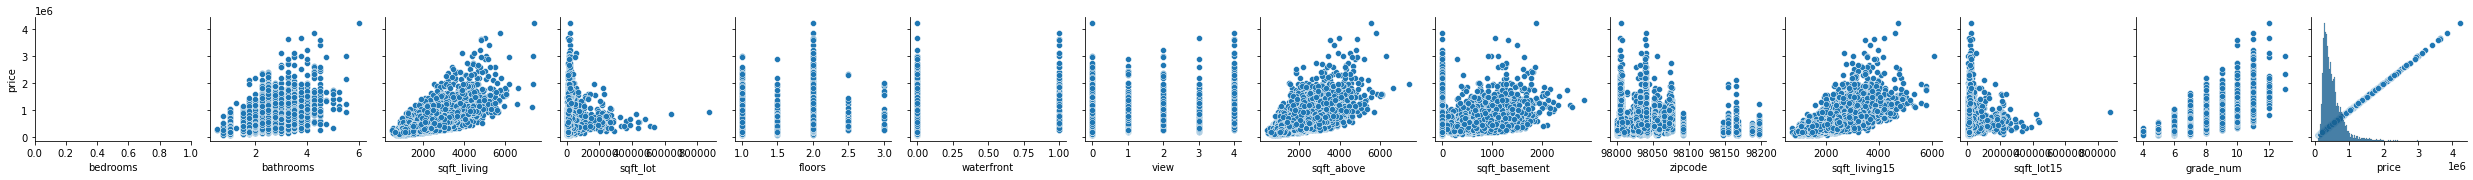

In [33]:
sns.pairplot(training_data, y_vars = 'price')